# Lab | Text Generation from Shakespeare's Sonnet

In [5]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
# Figure out how to import regularizers
from tensorflow.keras.regularizers import l1_l2, l1, l2

import tensorflow.keras.utils as ku
import numpy as np

In [6]:
tokenizer = Tokenizer()
# !wget --no-check-certificate \
#     https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
#     -O /tmp/sonnets.txt
data = open('/content/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [7]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length = max_sequence_len-1))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(128))
model.add(Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
model.add(Dense(total_words, activation='Softmax'))
# Pick an optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 10, 100)           337500    
                                                                 
 lstm_2 (LSTM)               (None, 10, 128)           117248    
                                                                 
 dropout_1 (Dropout)         (None, 10, 128)           0         
                                                                 
 lstm_3 (LSTM)               (None, 128)               131584    
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 3375)              435375    
                                                                 
Total params: 1038219 (3.96 MB)
Trainable params: 1038

In [8]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 13s 20ms/step - loss: 8.5368 - accuracy: 0.0223
Epoch 2/100
484/484 [==============================] - 4s 9ms/step - loss: 6.6417 - accuracy: 0.0229
Epoch 3/100
484/484 [==============================] - 4s 8ms/step - loss: 6.5846 - accuracy: 0.0221
Epoch 4/100
484/484 [==============================] - 4s 9ms/step - loss: 6.5813 - accuracy: 0.0214
Epoch 5/100
484/484 [==============================] - 4s 8ms/step - loss: 6.5830 - accuracy: 0.0225
Epoch 6/100
484/484 [==============================] - 4s 8ms/step - loss: 6.5803 - accuracy: 0.0232
Epoch 7/100
484/484 [==============================] - 4s 9ms/step - loss: 6.5786 - accuracy: 0.0214
Epoch 8/100
484/484 [==============================] - 4s 8ms/step - loss: 6.5779 - accuracy: 0.0212
Epoch 9/100
484/484 [==============================] - 4s 7ms/step - loss: 6.5781 - accuracy: 0.0223
Epoch 10/100
484/484 [==============================] - 4s 9ms/step - loss: 6.5778 - accu

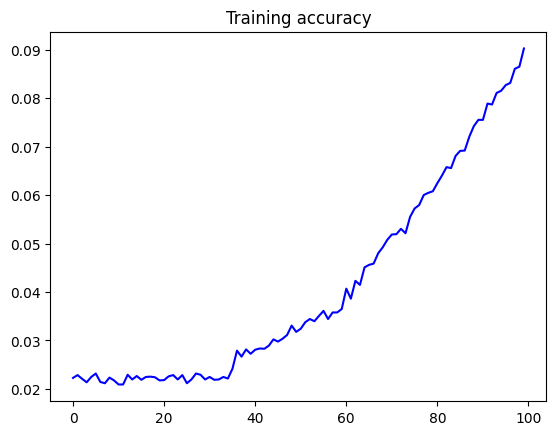

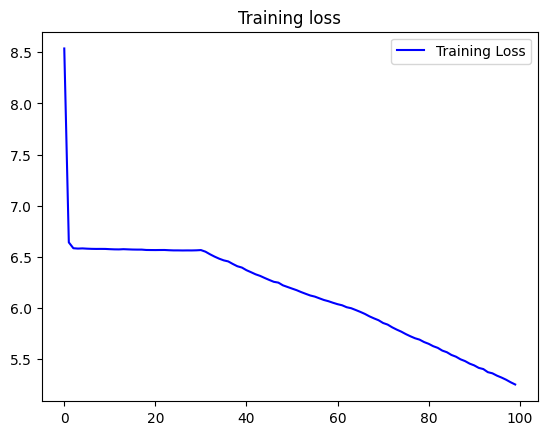

In [11]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [12]:
seed_text = "where is this sentence going, it might" #"Help me Obi Wan Kenobi, you're my only hope"
next_words = 100

for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted_probs = model.predict(token_list, verbose=0)
	predicted = np.argmax(predicted_probs, axis=-1)[0]
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

where is this sentence going, it might i see not eyes i ' ' see than not be love see love my love is i all than my love ' see my love be love all i be than the love in be than that see love in my love be love i see my love be love i see my love be love i see my love be love i see my love be love i see my love be love i see my love be love i see my love be love i see my love be love i see my love be love i
